### Import all necesary libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os


### Import Set Of Images

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

## Import all necessary resources

In [3]:

img2 = cv2.imread('/media/prakhar/Linux FIles/Flam Apps/Testing and experiment/cloud_archi/Cloud-Architecture/flam_cards/0.jpg') # trainImage
database_images = load_images_from_folder("/media/prakhar/Linux FIles/Flam Apps/Testing and experiment/cloud_archi/Cloud-Architecture/resources/school_bag")
# database_images = load_images_from_folder("/media/prakhar/Linux FIles/Flam Apps/Testing and experiment/cloud_archi/Cloud-Architecture/resources/flam_cards")


# img1_SIFT = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# img2_SIFT =cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)






### Break Images into Batches

####  Select Algoritm and matcher

In [4]:
print(len(database_images))

Batch_size = 20

batches = []

number_images = len(database_images)
number_batches = int(number_images/Batch_size)
if number_images%Batch_size != 0:
    number_batches +=1

i =0
for i in range(number_batches):
    image_temp =[]
    image_temp = database_images[i*Batch_size: (i+1)*Batch_size]
    batches.append(image_temp)
   
print(number_batches)


100
5


In [5]:
matching_methods = ["BF_matcher","FLANN_matcher"]

In [6]:
feature_extractions = ["ORB", "SIFT","BRISK"]


In [9]:
matcher_selection = int(input())

In [10]:
feature_selection = int(input())

In [11]:
print(matching_methods[matcher_selection])
print(feature_extractions[feature_selection])

FLANN_matcher
ORB


### Initialize the keyoint extractor

In [12]:
extractor = None
if feature_selection == 0:
    extractor = cv2.ORB_create(nfeatures =700)
elif feature_selection ==1:
    extractor = cv2.SIFT_create()
elif feature_selection ==2:
    extractor = cv2.BRISK_create()


### Initilizing the matcher 

In [13]:

matcher =None

if matcher_selection == 0 :
    matcher = cv2.BFMatcher()
elif matcher_selection == 1 and feature_selection == 1:
    matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
elif matcher_selection ==1  and (feature_selection==0 or feature_selection ==2):
    flann_params= dict(algorithm = 6,
                               table_number = 6, # 12
                               key_size = 12,     # 20
                               multi_probe_level = 1) #2
    matcher = cv2.FlannBasedMatcher(flann_params, {})
    


## Matching  images

### Computing keypoints of database

### computing keypoints for all images in data base

In [14]:
kps_database =[]
des_database = []
kps_temp= None
des_temp =None
i=0
for img_batch in batches:
    kps_batch=[]
    des_batch =[]
    for img in img_batch:
        kps_temp , des_temp = extractor.detectAndCompute(img,None)
        kps_batch.append(kps_temp)
        des_batch.append((des_temp))
    kps_database.append(kps_batch)
    des_database.append(des_batch)
print(len(des_database))

5


### Computing keypoints in Query image

In [15]:
threshold = 20
i=0

14
2


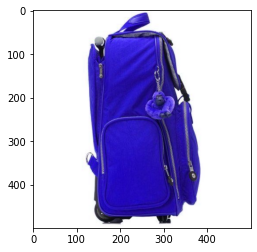

In [20]:
vid = cv2.VideoCapture(0)
current_batch_number =0
while True:
    success,frame = vid.read()
    cv2.imshow("recog " , frame)
    kp1=None
    des1=None
    kp1, des1 = extractor.detectAndCompute(frame,None)
    # print(len(kp1))
    matches_temp =None
    breakLoop =False
    i=0
    for descriptors in des_database[current_batch_number]:
        matches_temp = matcher.knnMatch(des1,descriptors, k=2)
        good = []
        for m_n in matches_temp:
            if len(m_n)!=2:
                continue
            (m,n) = m_n
            if m.distance < 0.6* n.distance:
                good.append(m)
#         print(len(good))
        if len(good) > threshold:
            breakLoop=True
            break
        i=i+1
    if breakLoop:
        cv2.destroyAllWindows()
        vid.release()
        break
   
    
    current_batch_number+=1
    if current_batch_number > (number_batches-1):
        current_batch_number=0
    k = cv2.waitKey(1)
    if k == 27:
        cv2.destroyAllWindows()
        vid.release()
        break
        
print(i)
print(current_batch_number)
img_test =batches[current_batch_number][i]
img_test = cv2.cvtColor(img_test,cv2.COLOR_BGR2RGB)
plt.imshow(img_test)
plt.imshow(batches[current_batch_number][i])

### Show Query Image

In [ ]:
print(i)
print(current_batch_number)

In [ ]:
plt.imshow(batches[current_batch_number][i])

### Matching Start

In [ ]:
matches = []
matches_temp =None

for descriptors in des_database:
    matches_temp = matcher.knnMatch(des1,descriptors, k=2)
    matches.append(matches_temp)



In [ ]:
goods =[]

for mat in matches:
    good = []
    for m_n in mat:
        if len(m_n)!=2:
            continue
        (m,n) = m_n
        if m.distance < 0.6* n.distance:
            good.append(m)
    goods.append(len(good))

print(len(goods))
print(goods)

In [ ]:
max_value = max(goods)

max_index= goods.index(max_value)

print(max_value)
print(max_index)

In [ ]:
plt.imshow(database_images[max_index])

### Draw Matches